<a href="https://colab.research.google.com/github/akashsabale01/DSBDA_Lab/blob/main/Ass_No_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ass No 2 - Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/Students_Performance_Updated123.csv')
df

,physics marks,chemistry marks,maths marks,percentage,rank
0,68,49,33,66,5
1,95,52,63,24,11
2,40,?,60,13,11
3,41,58,64,18,6
4,?,35,56,60,13
5,65,15,32,36,7
6,43,64,65,56,13
7,58,49,59,12,1
8,?,31,68,36,10
9,49,61,61,9,14


In [6]:
df.replace("?", np.nan, inplace = True)

In [7]:
df.isnull().sum()

physics marks      2
chemistry marks    2
maths marks        0
percentage         0
rank               0
dtype: int64

In [8]:
avg_physics_marks = df['physics marks'].astype('float').mean()
df['physics marks'].replace(np.nan, avg_physics_marks, inplace=True)
df['physics marks'].isnull().sum()

0

In [9]:
avg_chemistry_marks = df['chemistry marks'].astype('float').mean()
df['chemistry marks'].replace(np.nan, avg_chemistry_marks, inplace=True)
df['chemistry marks'].isnull().sum()

0

In [10]:
df

,physics marks,chemistry marks,maths marks,percentage,rank
0,68,49,33,66,5
1,95,52,63,24,11
2,40,41.0,60,13,11
3,41,58,64,18,6
4,59.083333,35,56,60,13
5,65,15,32,36,7
6,43,64,65,56,13
7,58,49,59,12,1
8,59.083333,31,68,36,10
9,49,61,61,9,14


In [11]:
df.isnull().sum()

physics marks      0
chemistry marks    0
maths marks        0
percentage         0
rank               0
dtype: int64

In [12]:
df.describe()

,maths marks,percentage,rank
count,14.000000,14.000000,14.000000
mean,51.285714,38.285714,8.214286
std,13.685639,21.359302,4.577177
min,32.000000,9.000000,1.000000
25%,37.500000,19.500000,4.250000
50%,57.500000,36.000000,8.500000
75%,62.500000,55.000000,12.500000
max,68.000000,75.000000,14.000000


# data transformations

In [31]:
df['physics marks'] = df['physics marks'].astype('int')
df['chemistry marks'] = df['chemistry marks'].astype('int')

df.dtypes

physics marks      int64
chemistry marks    int64
maths marks        int64
percentage         int64
rank               int64
dtype: object

# outlier detection

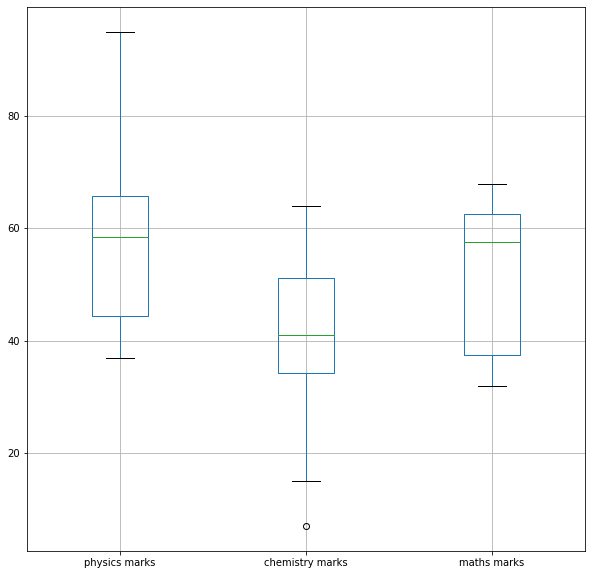

In [56]:

df.boxplot(column=['physics marks', 'chemistry marks', 'maths marks' ], figsize=(10,10))

In [50]:
# Outlier Detection
df[(df['chemistry marks']<20) | (df['chemistry marks']>80)]

,physics marks,chemistry marks,maths marks,percentage,rank
5,65,15,32,36,7
12,90,7,32,52,4


In [51]:
df[(df['physics marks']<20) | (df['physics marks']>80)]

,physics marks,chemistry marks,maths marks,percentage,rank
1,95,52,63,24,11
12,90,7,32,52,4


In [52]:
# Drop outlier by trimming method
new_df = df[(df['chemistry marks']>20) & (df['chemistry marks']<80)]
new_df = df[(df['physics marks']>20) & (df['physics marks']<80)]
new_df

,physics marks,chemistry marks,maths marks,percentage,rank
0,68,49,33,66,5
2,40,41,60,13,11
3,41,58,64,18,6
4,59,35,56,60,13
5,65,15,32,36,7
6,43,64,65,56,13
7,58,49,59,12,1
8,59,31,68,36,10
9,49,61,61,9,14
10,57,41,36,75,3


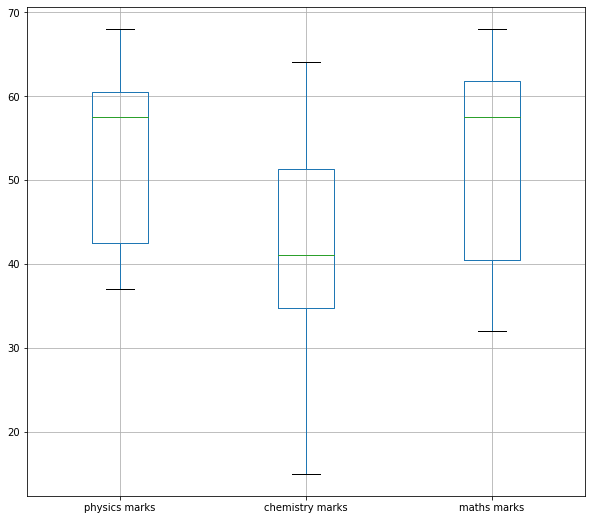

In [53]:
# After removing Outliers

new_df.boxplot(column=['physics marks', 'chemistry marks', 'maths marks' ], figsize=(10,9))